In [388]:
# %load ~/ipyhead
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Using:

* <strike>ERR431617: B cell memory</strike>
* ERR431572: B cell naive
* ERR431624: B cell naive
* ERR431583: Treg
* Microarray data: use one same cell type, one other distant cell type. Can we see the difference?

In [389]:
rna = pd.read_csv('summary.simple.tsv', sep='\t')
rna.head()

,sample_id,gene_name,est_counts,tpm
0,1,A1BG,80.232280,11.155641
1,1,A1CF,18.042401,0.382263
2,1,A2M,3.000000,1.226161
3,1,A2ML1,21.912401,2.756862
4,1,A2MP1,2.000000,0.092441


In [390]:
df = rna[rna['sample_id']==1].copy()

In [391]:
rna.shape, df.shape

((104496, 4), (34832, 4))

count    34832.000000
mean        28.709233
std        291.816455
min          0.000000
25%          0.000000
50%          0.515240
75%          6.705417
max      22917.900000
Name: tpm, dtype: float64

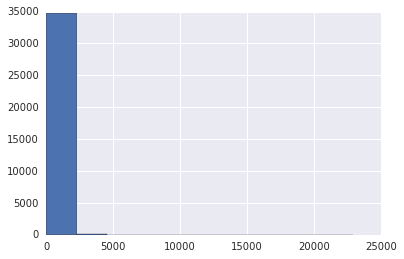

In [392]:
df.tpm.hist()
df.tpm.describe()

In [393]:
# get outliers (http://stackoverflow.com/a/31502974/130164)
df[((df.tpm - df.tpm.mean()) / df.tpm.std()).abs() > 3]

,sample_id,gene_name,est_counts,tpm
652,1,AC010970.2,24263.000000,2478.540000
1481,1,AC246787.8,13601.133660,1630.865846
3263,1,B2M,18599.995760,5728.604670
4830,1,CCNL1,12811.258600,1282.913390
4933,1,CD37,8314.153390,1529.731931
4957,1,CD69,5977.999000,970.521000
4961,1,CD74,39999.546260,6523.488970
4962,1,CD79A,6328.999000,1099.270000
5767,1,CLK1,6342.336148,990.738248
6067,1,COX4I1,6154.036060,1206.193410


In [394]:
df=df[df['tpm']!=0]

In [395]:
df['logtpm'] = df.tpm.apply(np.log2)
df['logcnt'] = df.est_counts.apply(np.log2)

count    21822.000000
mean         1.876540
std          3.187812
min        -25.593901
25%         -0.525184
50%          1.747749
75%          4.235832
max         14.484187
Name: logtpm, dtype: float64

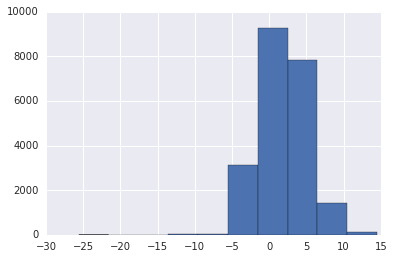

In [396]:
df.logtpm.hist()
df.logtpm.describe()

In [397]:
rna=rna[rna['tpm']!=0]
rna['logtpm'] = rna.tpm.apply(np.log2)
rna['logcnt'] = rna.est_counts.apply(np.log2)
rna.head()

,sample_id,gene_name,est_counts,tpm,logtpm,logcnt
0,1,A1BG,80.232280,11.155641,3.479702,6.326111
1,1,A1CF,18.042401,0.382263,-1.387362,4.173319
2,1,A2M,3.000000,1.226161,0.294148,1.584963
3,1,A2ML1,21.912401,2.756862,1.463027,4.453676
4,1,A2MP1,2.000000,0.092441,-3.435319,1.000000


In [398]:
rna.set_index(['sample_id', 'gene_name']).head()

est_counts        tpm    logtpm    logcnt
sample_id gene_name                                           
1         A1BG        80.232280  11.155641  3.479702  6.326111
          A1CF        18.042401   0.382263 -1.387362  4.173319
          A2M          3.000000   1.226161  0.294148  1.584963
          A2ML1       21.912401   2.756862  1.463027  4.453676
          A2MP1        2.000000   0.092441 -3.435319  1.000000

In [399]:
two_samples_logtpm = rna.reset_index().pivot(index='gene_name', columns='sample_id',values='logtpm')
two_samples_logcnt = rna.reset_index().pivot(index='gene_name', columns='sample_id',values='logcnt')
two_samples_logtpm.head()


sample_id,1,2,3
gene_name,,,
A1BG,3.479702,3.348695,4.042671
A1CF,-1.387362,-2.531273,-1.741175
A2M,0.294148,0.678451,0.176290
A2ML1,1.463027,-0.434278,0.834535
A2MP1,-3.435319,-3.710894,-2.707625


In [400]:
two_samples_logcnt.head()

sample_id,1,2,3
gene_name,,,
A1BG,6.326111,6.369809,6.735786
A1CF,4.173319,3.327486,4.104387
A2M,1.584963,2.000000,2.616178
A2ML1,4.453676,3.769132,4.416446
A2MP1,1.000000,1.000000,2.000001


In [401]:
two_samples = pd.merge(two_samples_logtpm, two_samples_logcnt, how='inner', left_index=True, right_index=True)
two_samples.shape

(26717, 6)

In [402]:
print two_samples.shape
print two_samples.dropna(how='any').shape

(26717, 6)
(18352, 6)


In [403]:
two_samples = two_samples.dropna(how='any')

In [404]:
two_samples.head()

sample_id,1_x,2_x,3_x,1_y,2_y,3_y
gene_name,,,,,,
A1BG,3.479702,3.348695,4.042671,6.326111,6.369809,6.735786
A1CF,-1.387362,-2.531273,-1.741175,4.173319,3.327486,4.104387
A2M,0.294148,0.678451,0.176290,1.584963,2.000000,2.616178
A2ML1,1.463027,-0.434278,0.834535,4.453676,3.769132,4.416446
A2MP1,-3.435319,-3.710894,-2.707625,1.000000,1.000000,2.000001


In [405]:
cols_1=['%d_logtpm' % i for i in range(1, len(two_samples.columns) / 2 + 1)]
cols_2=['%d_logcnt' % i for i in range(1, len(two_samples.columns) / 2 + 1)]
two_samples.columns = cols_1+cols_2
two_samples.head()

,1_logtpm,2_logtpm,3_logtpm,1_logcnt,2_logcnt,3_logcnt
gene_name,,,,,,
A1BG,3.479702,3.348695,4.042671,6.326111,6.369809,6.735786
A1CF,-1.387362,-2.531273,-1.741175,4.173319,3.327486,4.104387
A2M,0.294148,0.678451,0.176290,1.584963,2.000000,2.616178
A2ML1,1.463027,-0.434278,0.834535,4.453676,3.769132,4.416446
A2MP1,-3.435319,-3.710894,-2.707625,1.000000,1.000000,2.000001


What we want to do:
Treat microarray and rnaseq data as two samples. How much does it look like they're the same phenotype?

* Compare diffs
* Do hierarchical clustering and see how it looks. Are patterns the same?
* Look for differentially expressed genes, see how many are different (shouldn't be many)
* Sort by most highly expressed transcripts in each sample. Compare ratio between expression of top two.


Apparently running voom transformation on RNAseq data enables treating it like microarray data, i.e. doing linear modeling and GSEA.

In [406]:
# get microarray data
ma = pd.read_csv('../all_expressions.tsv', sep='\t')

In [407]:
del ma['Unnamed: 0']
del ma['ACCNUM']
del ma['Relabel']
del ma['DESC']

In [408]:
ma.head()

,geneid,probeid,PRB12534.Jurkat,PRB12535.Jurkat,PRB12536.Jurkat,PRB12537.IM.9,PRB12538.IM.9,PRB12539.IM.9,PRB12540.Raji,PRB12541.Raji,...,TEM_U133A_1 [TFH_E-MEXP-750|TEM_U133A_1],TEM_U133A_2 [TFH_E-MEXP-750|TEM_U133A_2],TEM_U133A_3 [TFH_E-MEXP-750|TEM_U133A_3],TN_U133A_1 [TFH_E-MEXP-750|TN_U133A_1],TN_U133A_2 [TFH_E-MEXP-750|TN_U133A_2],TN_U133A_3 [TFH_E-MEXP-750|TN_U133A_3],TH_1 [TREGs_GSE4527|GSM101518],Treg_1 [TREGs_GSE4527|GSM101519],TH_2 [TREGs_GSE4527|GSM101520],Treg_2 [TREGs_GSE4527|GSM101521]
0,RFC2,1053_at,2104.464,1913.695,1974.465,2428.428,2232.343,2470.156,831.009,713.614,...,278.508206,315.680926,325.445350,227.014010,298.255643,246.440867,317.871923,182.444126,481.930051,125.805188
1,RFC2,203696_s_at,2858.885,3889.223,2887.030,4171.271,4308.615,3523.738,1085.860,1109.435,...,278.508206,315.680926,325.445350,227.014010,298.255643,246.440867,317.871923,182.444126,481.930051,125.805188
2,HSPA6,117_at,189.528,110.972,160.200,432.932,261.238,280.899,184.187,178.548,...,12.987326,74.128591,141.683528,145.506877,21.656093,77.518896,82.051115,703.693696,194.230338,97.987345
3,HSPA6,213418_at,76.702,85.718,168.155,706.366,463.835,427.057,27.579,119.920,...,12.987326,74.128591,141.683528,145.506877,21.656093,77.518896,82.051115,703.693696,194.230338,97.987345
4,PAX8,121_at,1753.889,1291.766,1885.517,1561.437,1534.517,1540.394,1666.894,1625.360,...,26.766424,117.425553,58.012974,31.797787,102.044136,99.058819,147.641189,135.526908,38.741434,157.813189


In [409]:
for c in ma.columns:
    if 'naive' in c.lower():
        print c

Bcell-naive-1 [HG-U133A] [IRIS_GSE22886|GSM565308]
Bcell-naive-2 [HG-U133A] [IRIS_GSE22886|GSM565309]
Bcell-naive-3 [HG-U133A] [IRIS_GSE22886|GSM565310]
Bcell-naive-4 [HG-U133A] [IRIS_GSE22886|GSM565311]
Bcell-naive-5 [HG-U133A] [IRIS_GSE22886|GSM565312]
Bcell-naive-6 [HG-U133A] [IRIS_GSE22886|GSM565313]
Bcell-naive-7 [HG-U133A] [IRIS_GSE22886|GSM565314]


In [410]:
for c in ma.columns:
    if 'neutrophil' in c.lower():
        print c

A_LW_neutrophil_U133A.CEL
A_MF_neutrophils_U133A.CEL
A_LW_neutrophil_U133A [Chtanova_immune|A_LW_neutrophil_U133A]
A_MF_neutrophils_U133A [Chtanova_immune|A_MF_neutrophils_U133A]
Neutrophil-Resting-1 [HG-U133A] [IRIS_GSE22886|GSM565378]
Neutrophil-Resting-2 [HG-U133A] [IRIS_GSE22886|GSM565379]
Neutrophil-Resting-3 [HG-U133A] [IRIS_GSE22886|GSM565380]
Neutrophil-Resting-4 [HG-U133A] [IRIS_GSE22886|GSM565381]
Neutrophil-Resting-5 [HG-U133A] [IRIS_GSE22886|GSM565382]


In [411]:
ma = ma.set_index('geneid')[[
        'Bcell-naive-1 [HG-U133A] [IRIS_GSE22886|GSM565308]',
        'Bcell-naive-2 [HG-U133A] [IRIS_GSE22886|GSM565309]',
        'Neutrophil-Resting-1 [HG-U133A] [IRIS_GSE22886|GSM565378]'
    ]]

In [412]:
ma.columns = ['Bcell', 'Bcell2', 'Neutrophil'] # related, unrelated
ma.head()

,Bcell,Bcell2,Neutrophil
geneid,,,
RFC2,178.716943,374.972101,177.474794
RFC2,178.716943,374.972101,177.474794
HSPA6,56.191778,150.986117,3185.117837
HSPA6,56.191778,150.986117,3185.117837
PAX8,339.781267,298.001814,278.156498


In [413]:
rna_1 = df.set_index('gene_name')[['logtpm', 'logcnt']]
rna_1.head()

,logtpm,logcnt
gene_name,,
A1BG,3.479702,6.326111
A1CF,-1.387362,4.173319
A2M,0.294148,1.584963
A2ML1,1.463027,4.453676
A2MP1,-3.435319,1.000000


In [414]:
ma.index, two_samples.index

(Index([u'RFC2', u'RFC2', u'HSPA6', u'HSPA6', u'PAX8', u'PAX8', u'PAX8',
        u'PAX8', u'PAX8', u'PAX8',
        ...
        u'SCAF4', u'SCAF4', u'ZNF324B', u'ALS2CL', u'RNF126P1', u'TUBBP5',
        u'KCNE4', u'GALR3', u'TMEM231', u'NPEPL1'],
       dtype='object', name=u'geneid', length=17918),
 Index([u'A1BG', u'A1CF', u'A2M', u'A2ML1', u'A2MP1', u'A3GALT2', u'A4GALT',
        u'AAAS', u'AACS', u'AACSP1',
        ...
        u'ZXDB', u'ZXDC', u'ZYG11A', u'ZYG11B', u'ZYX', u'ZZEF1', u'ZZZ3',
        u'bP-21201H5.1', u'bP-2189O9.2', u'pk'],
       dtype='object', name=u'gene_name', length=18352))

In [415]:
assert len(two_samples.index) == len(two_samples.index.unique())

In [416]:
ma = ma.reset_index().groupby("geneid").agg('mean')


In [417]:
ma.head()

,Bcell,Bcell2,Neutrophil
geneid,,,
A1CF,592.243979,430.408190,469.842065
A2M,49.771470,142.655380,144.998331
A4GALT,81.824334,37.759109,17.479528
A4GNT,595.486500,404.809564,421.491447
AAAS,39.527998,38.934873,56.803877


In [418]:
assert len(ma.index) == len(ma.index.unique())

In [419]:
def compare_two_lists(a,b):
    x,y = set(a), set(b)
    print 'uniques:'
    print 'intersect: ', len(x&y)
    print 'in left ONLY : not in right:', len(x-y)
    print 'in right ONLY : not in left:', len(y-x)
print 'compare microarray (left), rna (right) gene names'
compare_two_lists(ma.index, two_samples.index)

compare microarray (left), rna (right) gene names
uniques:
intersect:  9533
in left ONLY : not in right: 1444
in right ONLY : not in left: 8819


Why are there so many new genes in RNAseq? Is the platform just that much better?

In [420]:
intersect= pd.merge(ma, two_samples, left_index=True,right_index=True, how='inner')
assert intersect.shape[0] == len(set(ma.index) & set(two_samples.index))
intersect.head()

,Bcell,Bcell2,Neutrophil,1_logtpm,2_logtpm,3_logtpm,1_logcnt,2_logcnt,3_logcnt
A1CF,592.243979,430.408190,469.842065,-1.387362,-2.531273,-1.741175,4.173319,3.327486,4.104387
A2M,49.771470,142.655380,144.998331,0.294148,0.678451,0.176290,1.584963,2.000000,2.616178
A4GALT,81.824334,37.759109,17.479528,-0.765860,0.866269,0.147569,1.000000,2.584963,3.169925
AAAS,39.527998,38.934873,56.803877,3.380071,3.864414,4.216052,5.807354,6.539159,6.894818
AACS,618.230944,495.105056,297.532754,4.844738,4.968377,4.205646,7.170448,7.816959,7.771140


In [421]:
# apply log2 to all microarray columns
intersect['Bcell'] = intersect.Bcell.apply(np.log2)
intersect['Bcell2'] = intersect.Bcell2.apply(np.log2)
intersect['Neutrophil'] = intersect.Neutrophil.apply(np.log2)

In [422]:
intersect.columns=['Bcell', 'Bcell2', 'Neutrophil'] + list(intersect.columns[3:])

In [423]:
from sklearn.preprocessing import scale
intersect = intersect.apply(lambda col: scale(col))

In [424]:
intersect.head()

,Bcell,Bcell2,Neutrophil,1_logtpm,2_logtpm,3_logtpm,1_logcnt,2_logcnt,3_logcnt
A1CF,0.485152,0.241549,0.411619,-1.487375,-1.763726,-1.810785,-0.751092,-1.047314,-1.062309
A2M,-1.520556,-0.616007,-0.402589,-0.927031,-0.742316,-1.146449,-1.619699,-1.471759,-1.572045
A4GALT,-1.117926,-1.648213,-1.867803,-1.280267,-0.682548,-1.156400,-1.816002,-1.284726,-1.382377
AAAS,-1.707185,-1.624401,-1.051586,0.101318,0.271533,0.253190,-0.202739,-0.020428,-0.106540
AACS,0.519932,0.350295,0.095214,0.589402,0.622840,0.249585,0.254691,0.388130,0.193615


In [425]:
intersect.describe()

,Bcell,Bcell2,Neutrophil,1_logtpm,2_logtpm,3_logtpm,1_logcnt,2_logcnt,3_logcnt
count,9.533000e+03,9.533000e+03,9.533000e+03,9.533000e+03,9.533000e+03,9.533000e+03,9.533000e+03,9.533000e+03,9.533000e+03
mean,-3.020650e-16,6.334316e-16,9.282947e-16,1.576533e-16,-2.215671e-16,2.158023e-17,-4.037122e-17,5.150489e-16,-9.732649e-17
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,-4.466778e+00,-4.082982e+00,-4.303610e+00,-3.218461e+00,-4.026241e+00,-3.480728e+00,-2.243622e+00,-4.789863e+00,-2.975183e+00
25%,-5.844549e-01,-5.839616e-01,-6.302179e-01,-6.917596e-01,-7.066070e-01,-6.921298e-01,-7.507423e-01,-7.628939e-01,-7.403406e-01
50%,1.912735e-01,1.669573e-01,7.292924e-02,1.027741e-01,1.313769e-01,1.716883e-01,7.856621e-02,1.085385e-01,1.447152e-01
75%,6.698421e-01,6.523575e-01,5.987231e-01,7.354498e-01,7.521345e-01,7.329170e-01,7.502113e-01,7.677622e-01,7.641014e-01
max,4.236574e+00,4.117322e+00,4.003621e+00,3.282300e+00,3.072973e+00,3.521413e+00,2.978695e+00,2.870392e+00,2.923703e+00


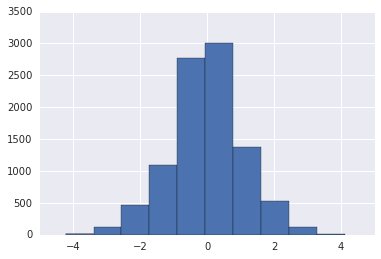

In [426]:
(intersect.Bcell - intersect['1_logtpm']).hist()

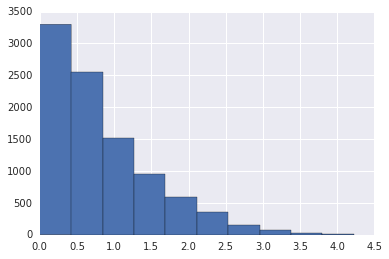

In [427]:
(intersect.Bcell - intersect['1_logtpm']).abs().hist()

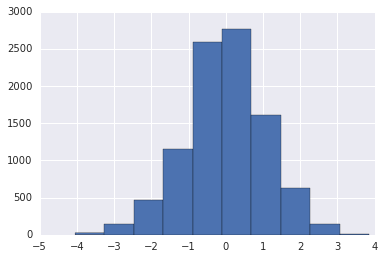

In [428]:
(intersect.Bcell - intersect['1_logcnt']).hist()

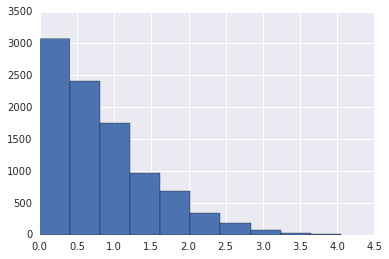

In [429]:
(intersect.Bcell - intersect['1_logcnt']).abs().hist()

other cell type

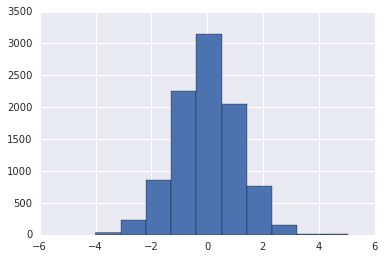

In [430]:
(intersect.Neutrophil - intersect['1_logcnt']).hist()

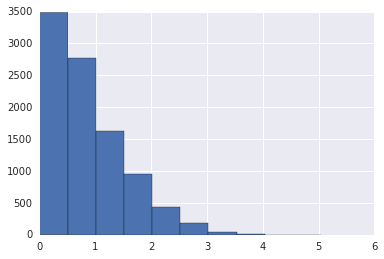

In [431]:
(intersect.Neutrophil - intersect['1_logcnt']).abs().hist()

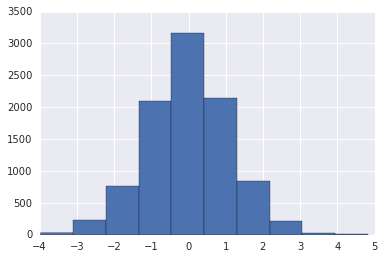

In [432]:
(intersect.Neutrophil - intersect['1_logtpm']).hist()

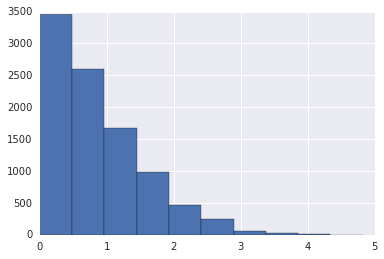

In [433]:
(intersect.Neutrophil - intersect['1_logtpm']).abs().hist()

Difference plots between RNA-seq, microarray versions of B-cells naive look exactly like difference plots between RNA-seq B-cells naive and microarray neutrophil. Even when you normalize to 0 mean, unit variance first. Bad!

# Difference between 2 microarray lines that should be different.

* What's the baseline difference we expect?
* Is filtering to marker genes helpful in seeing the difference? Is there a lot of noise otherwise?

Here's the baseline difference, without filtering to marker genes. Looks pretty similar overall.

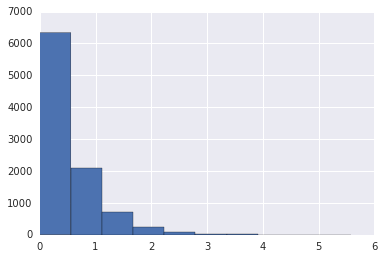

In [434]:
(intersect.Neutrophil - intersect.Bcell).abs().hist()

Let's load up marker genes from Bindea, since we saw that there was not much noise there.

In [435]:
bindea = pd.read_csv('../bindea_by_category.csv')
bindea.head()

,B cells,Blood vessels,CD8 T cells,Cytotoxic cells,DC,Eosinophils,Lymph vessels,Macrophages,Mast cells,NK CD56bright cells,...,TReg,Tcm,Tem,Tgd,Th1 cells,Th17 cells,Th2 cells,aDC,iDC,pDC
0,207819_s_at,204677_at,218405_at,209870_s_at,206407_s_at,205566_at,206742_at,203381_s_at,203196_at,215908_at,...,221333_at,203747_at,212609_s_at,205103_at,213419_at,208402_at,213245_at,207533_at,209735_at,206148_at
1,221234_s_at,NaN,217729_s_at,221087_s_at,207900_at,49452_at,204879_at,218673_s_at,206281_at,215409_at,...,221334_s_at,216197_at,210109_at,207840_at,40148_at,216876_s_at,220841_s_at,219424_at,202201_at,NaN
2,219497_s_at,NaN,209871_s_at,214450_at,207861_at,43427_at,209946_at,214452_at,205428_s_at,204014_at,...,NaN,208442_s_at,206978_at,203562_at,201525_at,205707_at,220842_at,210029_at,220162_s_at,NaN
3,210347_s_at,NaN,219168_s_at,204794_at,207277_at,221928_at,NaN,214390_s_at,206676_at,204015_s_at,...,NaN,210858_x_at,207794_at,211144_x_at,212062_at,206419_at,221569_at,205569_at,210325_at,NaN
4,206255_at,NaN,64432_at,37145_at,205404_at,222195_s_at,NaN,208075_s_at,214533_at,205906_at,...,NaN,207686_s_at,208719_s_at,216920_s_at,201641_at,NaN,214373_at,218400_at,206749_at,NaN


In [436]:
print bindea.columns

Index([u'B cells', u'Blood vessels', u'CD8 T cells', u'Cytotoxic cells', u'DC',
       u'Eosinophils', u'Lymph vessels', u'Macrophages', u'Mast cells',
       u'NK CD56bright cells', u'NK CD56dim cells', u'NK cells',
       u'Neutrophils', u'Normal mucosa', u'SW480 cancer cells', u'T cells',
       u'T helper cells', u'TFH', u'TReg', u'Tcm', u'Tem', u'Tgd',
       u'Th1 cells', u'Th17 cells', u'Th2 cells', u'aDC', u'iDC', u'pDC'],
      dtype='object')


In [437]:
# match by gene ids instead of probe ids
# see extractHumanAnnotations.R
annotations = pd.read_csv('../annot.tsv', sep='\t')
annotations = annotations.reset_index()
annotations.columns = ['probe', 'accession', 'symbol', 'desc']
annotations.head()

,probe,accession,symbol,desc
0,1007_s_at,U48705,NaN,NaN
1,1053_at,M87338,RFC2,"replication factor C (activator 1) 2, 40kDa"
2,117_at,X51757,HSPA6,heat shock 70kDa protein 6 (HSP70B')
3,121_at,X69699,PAX8,paired box 8
4,1255_g_at,L36861,GUCA1A,guanylate cyclase activator 1A (retina)


In [438]:
markers = pd.DataFrame({'probe': bindea['B cells'].dropna().unique()})
markers.head()

,probe
0,207819_s_at
1,221234_s_at
2,219497_s_at
3,210347_s_at
4,206255_at


In [439]:
markers = pd.merge(markers, annotations, how='left', on='probe')
print markers.shape
markers.head()

(40, 4)


,probe,accession,symbol,desc
0,207819_s_at,NM_000443,ABCB4,"ATP-binding cassette, sub-family B (MDR/TAP), ..."
1,221234_s_at,NM_021813,BACH2,"BTB and CNC homology 1, basic leucine zipper t..."
2,219497_s_at,NM_022893,BCL11A,B-cell CLL/lymphoma 11A (zinc finger protein)
3,210347_s_at,AF080216,BCL11A,B-cell CLL/lymphoma 11A (zinc finger protein)
4,206255_at,NM_001715,BLK,"BLK proto-oncogene, Src family tyrosine kinase"


In [440]:
markers = markers.symbol.dropna().unique()
markers

array(['ABCB4', 'BACH2', 'BCL11A', 'BLK', 'BLNK', 'CCR9', 'CD19', 'CD72',
       'COCH', 'CR2', 'LOC101929272', 'KIAA0125', 'FCRL2', 'GLDC', 'GNG7',
       'HLA-DOB', 'IGH', 'IGHM', 'IGKC', 'IGLC1', 'MEF2C', 'MICAL3',
       'MS4A1', 'OSBPL10', 'PNOC', 'QRSL1', 'SCN3A', 'SLC15A2', 'SPIB',
       'TCL1A', 'TNFRSF17'], dtype=object)

In [441]:
len(markers), len(set(markers) & set(intersect.index))

(31, 25)

In [442]:
markers = list(set(markers) & set(intersect.index))
len(markers)

25

In [443]:
# filter down
df_filter = intersect.loc[markers].copy()
print intersect.shape, ' --> ', df_filter.shape
df_filter.head()

(9533, 9)  -->  (25, 9)


,Bcell,Bcell2,Neutrophil,1_logtpm,2_logtpm,3_logtpm,1_logcnt,2_logcnt,3_logcnt
CD72,0.983322,1.032542,-2.115601,0.837122,0.736294,-0.054686,0.617863,0.498313,-0.427174
BCL11A,1.382500,1.474293,0.381042,1.076565,1.004027,-1.301200,0.931528,0.774448,-1.174610
SLC15A2,0.557017,0.501420,-0.212756,0.038338,0.116155,-1.633529,-0.113149,0.243952,-1.119449
CCR9,0.913356,0.539153,0.379948,-1.744846,-0.555985,-0.336995,-1.619699,-1.049091,-0.383072
IGKC,3.479534,3.570829,-0.268589,2.470326,2.059956,-1.980835,1.810834,1.427123,-2.468129


In [444]:
# before filtering
intersect.describe()

,Bcell,Bcell2,Neutrophil,1_logtpm,2_logtpm,3_logtpm,1_logcnt,2_logcnt,3_logcnt
count,9.533000e+03,9.533000e+03,9.533000e+03,9.533000e+03,9.533000e+03,9.533000e+03,9.533000e+03,9.533000e+03,9.533000e+03
mean,-3.020650e-16,6.334316e-16,9.282947e-16,1.576533e-16,-2.215671e-16,2.158023e-17,-4.037122e-17,5.150489e-16,-9.732649e-17
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,-4.466778e+00,-4.082982e+00,-4.303610e+00,-3.218461e+00,-4.026241e+00,-3.480728e+00,-2.243622e+00,-4.789863e+00,-2.975183e+00
25%,-5.844549e-01,-5.839616e-01,-6.302179e-01,-6.917596e-01,-7.066070e-01,-6.921298e-01,-7.507423e-01,-7.628939e-01,-7.403406e-01
50%,1.912735e-01,1.669573e-01,7.292924e-02,1.027741e-01,1.313769e-01,1.716883e-01,7.856621e-02,1.085385e-01,1.447152e-01
75%,6.698421e-01,6.523575e-01,5.987231e-01,7.354498e-01,7.521345e-01,7.329170e-01,7.502113e-01,7.677622e-01,7.641014e-01
max,4.236574e+00,4.117322e+00,4.003621e+00,3.282300e+00,3.072973e+00,3.521413e+00,2.978695e+00,2.870392e+00,2.923703e+00


In [445]:
# after filtering
df_filter.describe()

,Bcell,Bcell2,Neutrophil,1_logtpm,2_logtpm,3_logtpm,1_logcnt,2_logcnt,3_logcnt
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1.345793,1.427893,-0.295742,0.664565,0.705594,-0.866049,0.652972,0.666555,-0.898570
std,0.871750,0.875976,0.860453,0.936672,0.809542,0.726853,0.924706,0.851994,0.853841
min,-0.394706,-0.149359,-2.247710,-1.744846,-1.115261,-2.158526,-1.619699,-1.057160,-2.468129
25%,0.913356,0.836902,-1.079924,0.333474,0.318041,-1.522723,0.277496,0.243952,-1.506563
50%,1.093010,1.332814,0.023958,0.856893,0.745268,-0.816695,0.716760,0.774448,-0.771234
75%,1.754715,1.800412,0.264952,1.076565,1.109950,-0.425272,1.064959,1.117163,-0.405369
max,3.479534,3.570829,0.913162,2.501701,2.400513,0.383452,2.301936,2.191614,0.907712


Can already see the difference in means!!!

* Filtered: means are 1.3, -0.36
* Unfiltered: means are 0,0


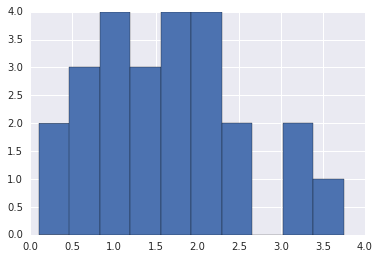

In [446]:
(df_filter.Neutrophil - df_filter.Bcell).abs().hist()

Now that's a noticeable difference. (Note however that sample size is significantly smaller.)

# Difference between 2 microarray lines that should be same

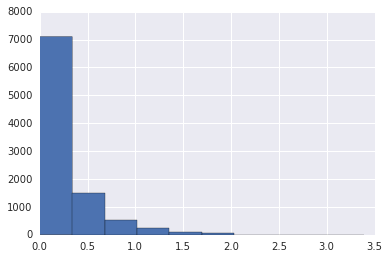

In [447]:
(intersect.Bcell2 - intersect.Bcell).abs().hist()

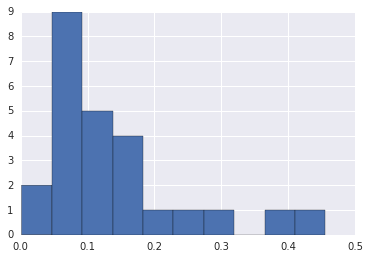

In [448]:
(df_filter.Bcell2 - df_filter.Bcell).abs().hist()

Much less difference. These comparisons are working. Now let's compare microarray and RNAseq.

# Difference between two RNA raw lines that should be same

First, without filtering:

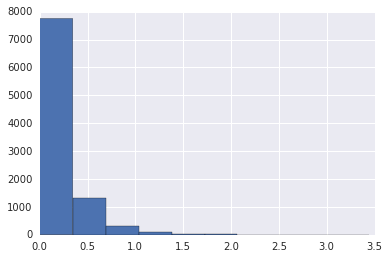

In [449]:
(intersect['2_logtpm'] - intersect['1_logtpm']).abs().hist()

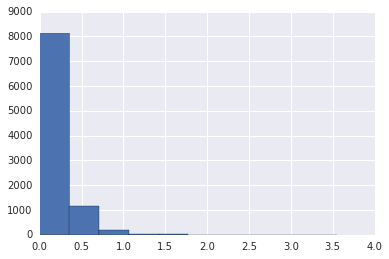

In [450]:
(intersect['2_logcnt'] - intersect['1_logcnt']).abs().hist()

Next, with filtering:

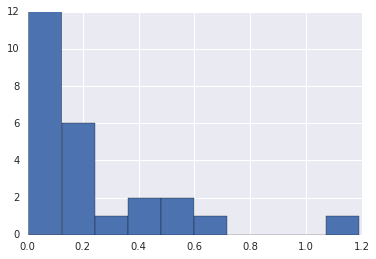

In [451]:
(df_filter['2_logtpm'] - df_filter['1_logtpm']).abs().hist()

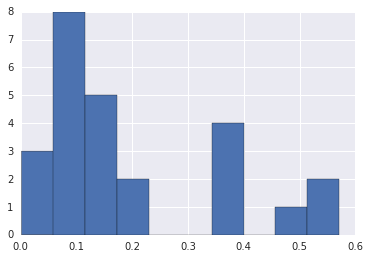

In [452]:
(df_filter['2_logcnt'] - df_filter['1_logcnt']).abs().hist()

Here, even without filtering, you can tell that they're pretty similar. Again, filtering helps throw out the noise.

# Difference between two RNA raw lines that should be different

First, without filtering:

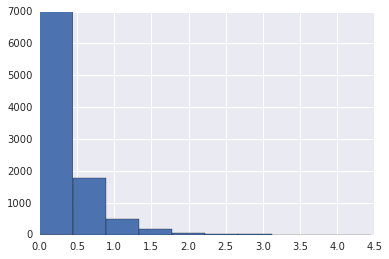

In [454]:
(intersect['3_logtpm'] - intersect['1_logtpm']).abs().hist()

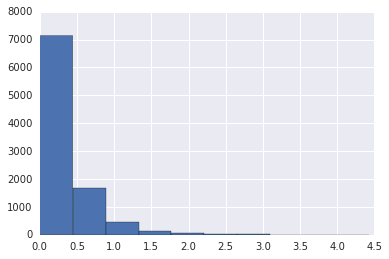

In [455]:
(intersect['3_logcnt'] - intersect['1_logcnt']).abs().hist()

Second, with filtering:

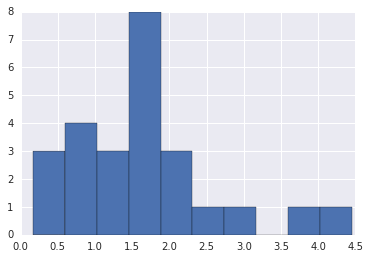

In [458]:
(df_filter['3_logtpm'] - df_filter['1_logtpm']).abs().hist()

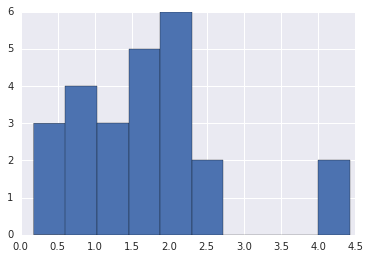

In [457]:
(df_filter['3_logcnt'] - df_filter['1_logcnt']).abs().hist()

Without filtering, hard to tell that there's a difference.

With filtering, you can tell by the scale!

**We've demonstrated that you can tell apart RNAseq lines from different cell types, but not from the same cell type. Phenotype distinctions exist and are readily visible if you filter to the right genes!**
The same is known to be true about microarray data, and we saw it above.

# Difference between 1 microarray, 1 rnaseq line that should be same

First, without filtering

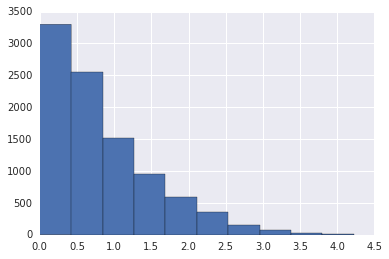

In [460]:
(intersect['Bcell'] - intersect['1_logtpm']).abs().hist()

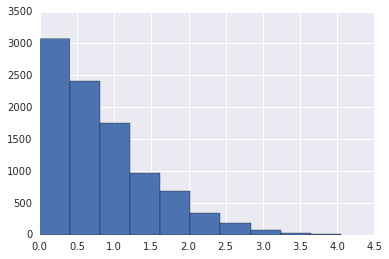

In [461]:
(intersect['Bcell'] - intersect['1_logcnt']).abs().hist()

Second, with filtering

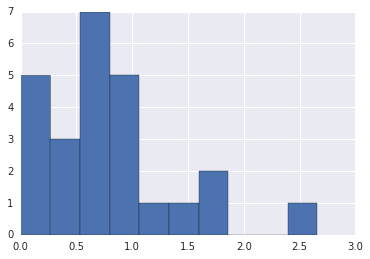

In [462]:
(df_filter['Bcell'] - df_filter['1_logtpm']).abs().hist()

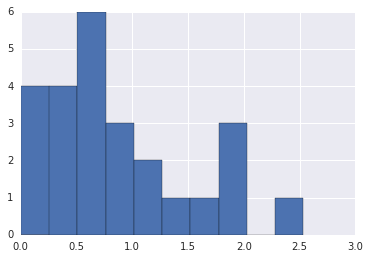

In [463]:
(df_filter['Bcell'] - df_filter['1_logcnt']).abs().hist()

Some but not much difference. Filtering helps slightly, but even without filtering looks like that.

tpm and count seem to look similar. Maybe scaling TPM will help. TODO: scale TPM and try this again.

# Difference between 1 microarray, 1 rnaseq line that should be diff

First, without filtering:

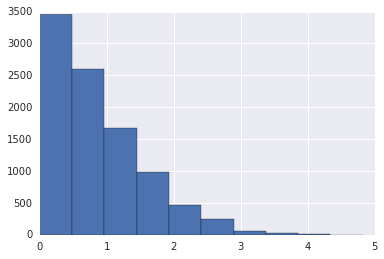

In [464]:
(intersect['Neutrophil'] - intersect['1_logtpm']).abs().hist()

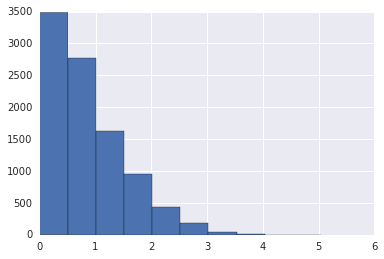

In [465]:
(intersect['Neutrophil'] - intersect['1_logcnt']).abs().hist()

Second, with filtering:

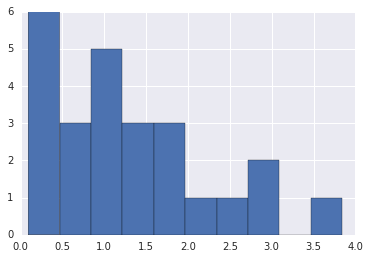

In [466]:
(df_filter['Neutrophil'] - df_filter['1_logtpm']).abs().hist()

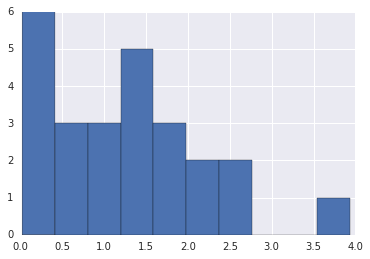

In [467]:
(df_filter['Neutrophil'] - df_filter['1_logcnt']).abs().hist()

In these comparisons, it's much less clear whether different or same. The max mark on the scale is the only giveaway, and it's a change of ~ 1; in microarray vs. microarray or RNAseq vs RNAseq, the difference was around 3. This is all on the log scale though, so there's some signal there, but RNAseq vs microarray seems a little more unruly.

## Look at whether highly (differentially?) expressed genes follow same pattern amongst themselves

Filtered to marker genes.

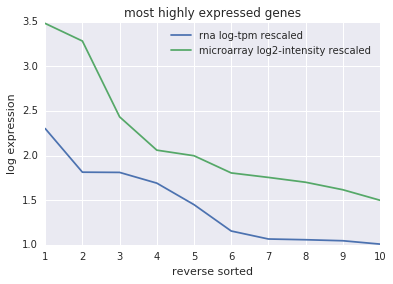

In [486]:
n=10
rna_top = df_filter['1_logcnt'].sort_values(inplace=False, ascending=False).head(n=n).values
ma_top = df_filter['Bcell'].sort_values(inplace=False, ascending=False).head(n=n).values
xs = np.arange(1,n+1)
plt.plot(xs,rna_top, label='rna log-tpm rescaled')
plt.plot(xs,ma_top, label='microarray log2-intensity rescaled')
plt.xticks(xs)
plt.title('most highly expressed genes')
plt.xlabel('reverse sorted')
plt.ylabel('log expression')
plt.legend(loc='best')

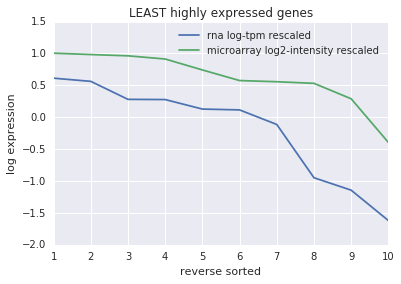

In [487]:
n=10
rna_bot = df_filter['1_logcnt'].sort_values(inplace=False, ascending=False).tail(n=n).values
ma_bot = df_filter['Bcell'].sort_values(inplace=False, ascending=False).tail(n=n).values
xs = np.arange(1,n+1)
plt.plot(xs,rna_bot, label='rna log-tpm rescaled')
plt.plot(xs,ma_bot, label='microarray log2-intensity rescaled')
plt.xticks(xs)
plt.title('LEAST highly expressed genes')
plt.xlabel('reverse sorted')
plt.ylabel('log expression')
plt.legend(loc='best')

Looks like there's a constant offset, but otherwise tracks quite well.

Ratio between most highly and least highly expressed genes tracks very well! :

In [489]:
rna_top[0] / rna_bot[0]

3.7573531364764374

In [490]:
ma_top[0] / ma_bot[0]

3.4634560955351739

Plot more genes:

* in filtered list, we see the constant difference
* in nonfiltered list, there's a bizarre intersection, but overall constant absolute difference

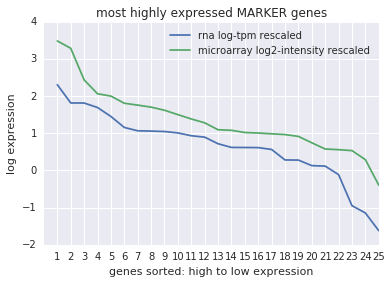

In [497]:
n=1000
rna_top = df_filter['1_logcnt'].sort_values(inplace=False, ascending=False).head(n=n).values
ma_top = df_filter['Bcell'].sort_values(inplace=False, ascending=False).head(n=n).values
xs = np.arange(1,len(rna_top)+1)
plt.plot(xs,rna_top, label='rna log-tpm rescaled')
plt.plot(xs,ma_top, label='microarray log2-intensity rescaled')
plt.xticks(xs)
plt.title('most highly expressed MARKER genes')
plt.xlabel('genes sorted: high to low expression')
plt.ylabel('log expression')
plt.legend(loc='best')

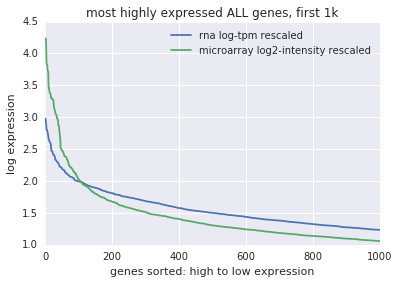

In [496]:
n=1000
rna_top = intersect['1_logcnt'].sort_values(inplace=False, ascending=False).head(n=n).values
ma_top = intersect['Bcell'].sort_values(inplace=False, ascending=False).head(n=n).values
xs = np.arange(1,len(rna_top)+1)
plt.plot(xs,rna_top, label='rna log-tpm rescaled')
plt.plot(xs,ma_top, label='microarray log2-intensity rescaled')
plt.title('most highly expressed ALL genes, first 1k')
plt.xlabel('genes sorted: high to low expression')
plt.ylabel('log expression')
plt.legend(loc='best')